# **🌱 EPOCH 비기너 세션 Final Test 🔥**





---



## **1️⃣ 'Sleep_health_and_lifestyle_dataset.csv' 파일을 불러와 수면 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [4]:
import pandas as pd
data= pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### (1) 성별에 따른 평균 수면 시간('Sleep Duration')을 출력하세요.

In [5]:
data.groupby(by=data['Gender'])['Sleep Duration'].mean()

,Sleep Duration
Gender,
Female,7.229730
Male,7.036508


### (2) 스트레스 수준('Stress Level')이 3 이상인 사람들의 수면 질('Quality of Sleep') 평균을 구하세요.

In [6]:
data1= data[data['Stress Level'] >=3]
data1['Quality of Sleep'].mean()

np.float64(7.31283422459893)

### (3) 아래와 같은 수면 데이터에 대한 네 가지 그래프를 그리세요.
* colors = ['gold', 'gray','darkgray', 'silver', 'lightgray', 'whitesmoke'] & 'coral' & 'purple' & 'green'

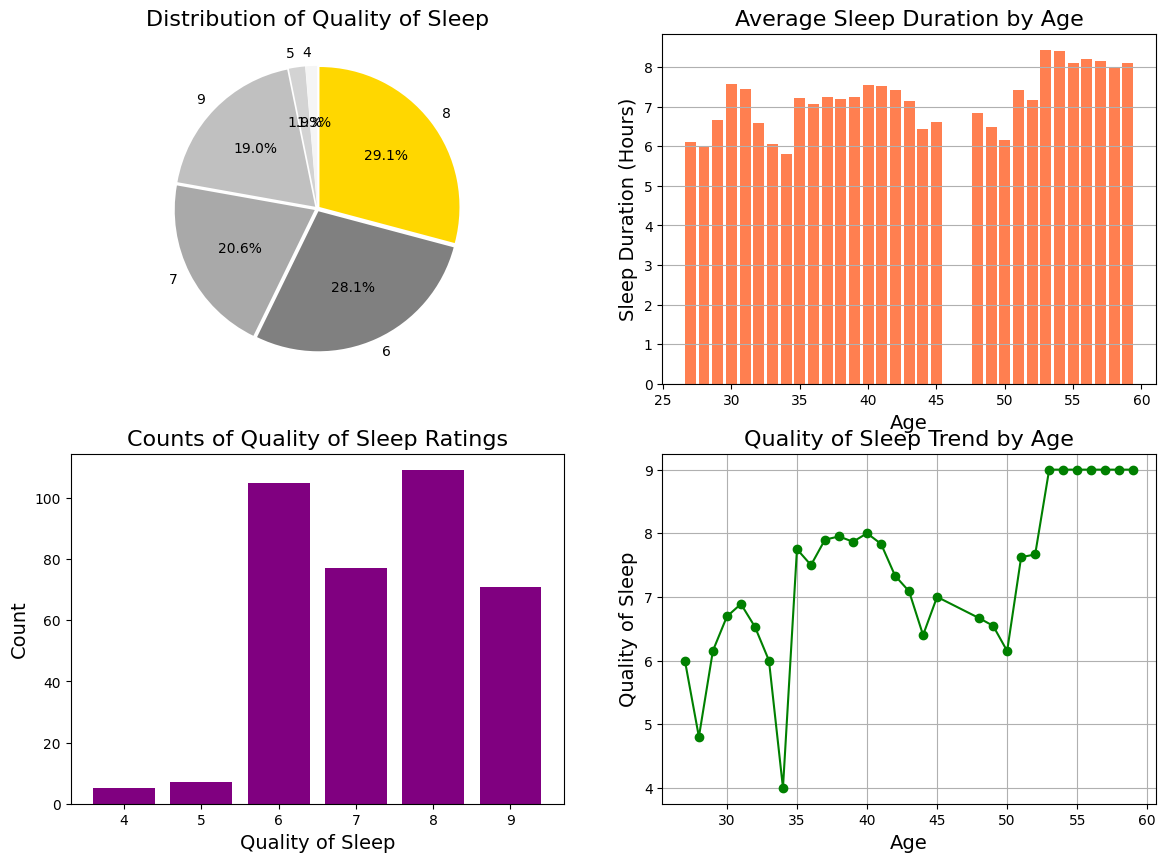

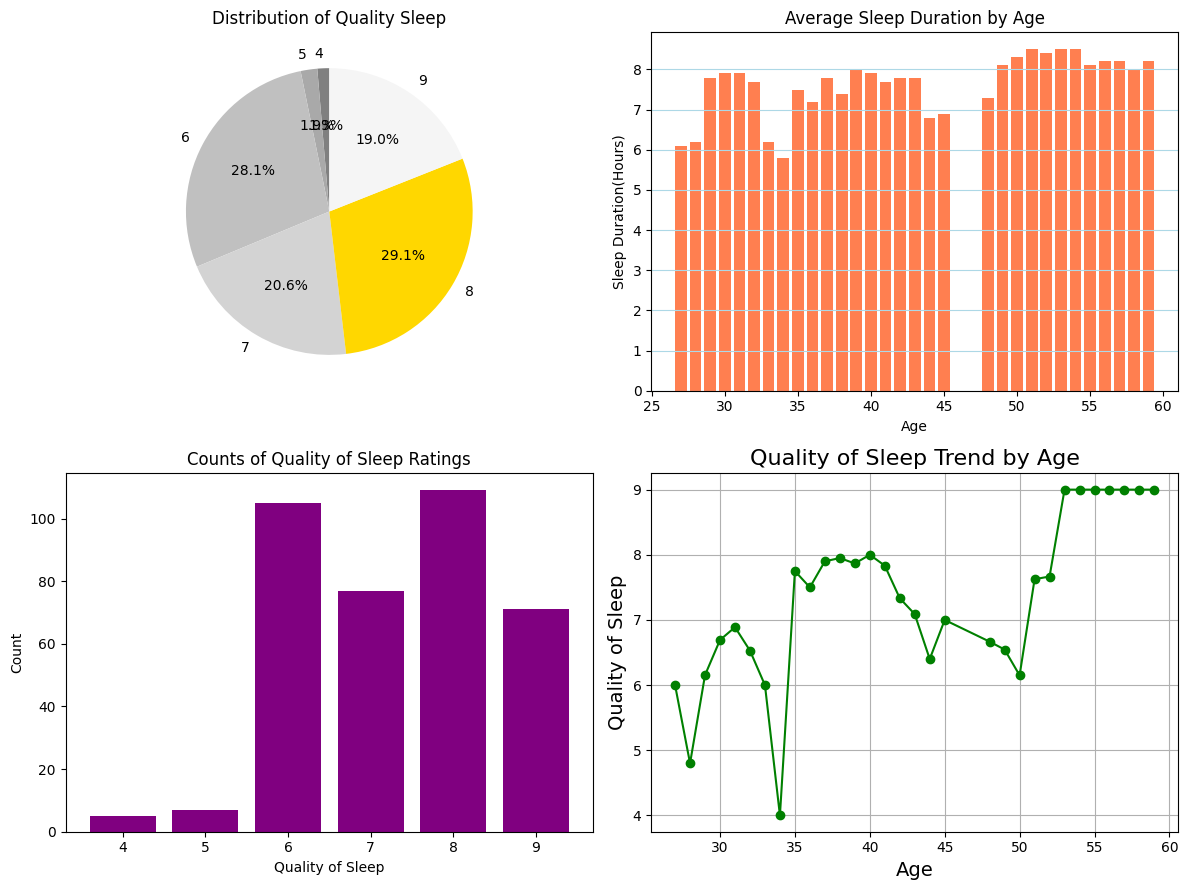

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
data2= data['Quality of Sleep'].value_counts().sort_index()
colors = ['gray','darkgray', 'silver', 'lightgray','gold', 'whitesmoke']
plt.pie(data2, labels= data2.index, autopct='%.1f%%', startangle=90, colors= colors)
plt.title('Distribution of Quality Sleep')

plt.subplot(2,2,2)
plt.bar(data['Age'], data['Sleep Duration'], color= 'coral')
plt.title('Average Sleep Duration by Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration(Hours)')
plt.grid(True, axis='y', color= 'lightblue')

plt.subplot(2,2,3)
sleep = data.groupby('Quality of Sleep')['Sleep Duration'].count().reset_index()
plt.bar(x,sleep['Sleep Duration'],color='purple')
plt.xticks(x,sleep['Quality of Sleep'])
plt.title('Counts of Quality of Sleep Ratings')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')

plt.subplot(2,2,4)
age_sleep_quality = data.groupby('Age')['Quality of Sleep'].mean().reset_index()
plt.plot(age_sleep_quality['Age'], age_sleep_quality['Quality of Sleep'], marker='o', color='green')
plt.title('Quality of Sleep Trend by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Quality of Sleep', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

## **2️⃣‘calendar.csv' 파일과 'listings.csv' 파일을 불러와 Airbnb 예약 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [11]:
data3= pd.read_csv('calendar.csv')
data4= pd.read_csv('listings.csv')
data3.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2024-06-24,f,$90.00,NaN,30.0,1125.0
1,6606,2024-06-25,f,$90.00,NaN,30.0,1125.0
2,6606,2024-06-26,f,$90.00,NaN,30.0,1125.0
3,6606,2024-06-27,f,$90.00,NaN,30.0,1125.0
4,6606,2024-06-28,f,$90.00,NaN,30.0,1125.0


In [12]:
data4.head()

,listing_id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Unnamed: 12
0,6606.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
1,9419.0,Glorious sun room w/ memory foambed,30559,Angielena,Private room,76,2,196,10.0,337,15,Exempt,NaN
2,9531.0,The Adorable Sweet Orange Craftsman,31481,Cassie,Entire home/apt,189,3,97,2.0,133,23,STR-OPLI-19-002182,NaN
3,9534.0,The Coolest Tangerine Dream MIL!,31481,Cassie,Entire home/apt,125,2,77,2.0,1,2,STR-OPLI-19-002182,NaN
4,9596.0,"the down home , spacious, central and fab!",14942,Joyce,Entire home/apt,NaN,30,96,2.0,16,0,STR -OPLI-19-002622,NaN


### (1) 두 데이터셋을 'listing_id'를 기준으로 병합하여 숙소가 예약이 가능한 상태인 날짜의 수를 세어 숙소별로 출력하세요.
* Hint: 'availability_365'가 0보다 크면 예약 가능한 상태

In [41]:
data5= pd.merge(data3, data4, on='listing_id')
data5
available = data5[data5['available'] == 't']
available
available.groupby('listing_id')['date'].nunique()


,date
listing_id,
6606,147
9419,337
9531,133
9534,1
9596,16
...,...
54385010,102
54396923,77
54396956,65
